In [1]:
%load_ext lab_black

### Analysing IMDB dataset for model parameters and cleaning pipeline

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from easy_eda.univariate import numerical_summary, categorical_summary
import re
import contractions
import nltk
from nltk.corpus import stopwords

nltk.download("stopwords")

warnings.filterwarnings(action="ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/sharoonsaxena/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Importing data and First look

In [3]:
data = pd.read_csv("IMDB.csv")
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


<img src="https://cdn.analyticsvidhya.com/wp-content/uploads/2019/01/Screenshot-from-2019-01-18-15-51-14.png">

In [4]:
print(data.review[0] + "\n\n")
len(data)

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

50000

**Potential Cleaning**
* lowercasing
* removing symbols
* removing html tags
* contractions (couldn't : could not)
* stop words (reduces model complexity)

### IMDB cleaner:
text cleaning pipeline

In [5]:
%%writefile imdb_cleaner.py

import contractions
import re
import nltk
from nltk.corpus import stopwords

def to_lower_case(text):
    return text.lower()


def symbol_remover(text):
    return re.sub(r"[^\w]", " ", text)

def alphabet_remover(number):
    return re.sub(r"[^a-zA-Z]", "", text)

def html_remover(text):
    cleaner = re.compile("<.*?>")
    return re.sub(cleaner, " ", text)


def contraction_remover(text):
    words = list(text.split())
    expanded = map(contractions.fix, words)
    return " ".join(expanded)


def stop_words_remover(text):
    pattern = re.compile(r"\b(" + r"|".join(stopwords.words("english")) + r")\b\s*")
    text = pattern.sub("", text)
    return text


def imdb_cleaner(text):
    lower = to_lower_case(text)
    no_html = html_remover(lower)
    no_symbol = symbol_remover(no_html)
    no_contractions = contraction_remover(no_symbol)
    final_text = stop_words_remover(no_contractions)
    return final_text

Overwriting imdb_cleaner.py


In [6]:
from imdb_cleaner import *

In [7]:
to_lower_case("I'll Be Back : <br /><br /> Else You'll Not Be")

"i'll be back : <br /><br /> else you'll not be"

In [8]:
symbol_remover("I'll Be Back : <br /><br /> Else You'll Not Be")

'I ll Be Back    br    br    Else You ll Not Be'

In [9]:
html_remover("I'll Be Back : <br /><br /> Else You'll Not Be")

"I'll Be Back :    Else You'll Not Be"

In [10]:
contraction_remover("I'll Be Back : <br /><br /> Else You'll Not Be")

'I will Be Back : <br /><br /> Else you will Not Be'

In [11]:
stop_words_remover("I'll Be Back : <br /><br /> Else You'll Not Be")

"I'Be Back : <br /><br /> Else You'Not Be"

**Contraction and stop-word tradeoff**
* most of the contractions expanded will be removed by stop words.
* contractions expansion is suited for text generation or summarisation. stopwords are not recommended for that.
* Since output of this problem is a label. We can go ahead with using stop words.

### Cleaning imdb reviews using imdb_cleaner

In [12]:
data["clean_text"] = data["review"].map(imdb_cleaner)
data.head()

,review,sentiment,clean_text
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...


In [13]:
print(data.review[0] + "\n\n")
print(data.clean_text[0])

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

**Potential Improvements**
* stemming, lemma, normalize
* slang remover, slang corrections

### Analysing for model parameters

In [14]:
def word_count(text):
    return len(text.split())


data["word_count"] = data["clean_text"].map(word_count)
data.head()

,review,sentiment,clean_text,word_count
0,One of the other reviewers has mentioned that ...,positive,one reviewers mentioned watching 1 oz episode ...,161
1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...,86
2,I thought this was a wonderful way to spend ti...,positive,thought wonderful way spend time hot summer we...,85
3,Basically there's a family where a little boy ...,negative,basically family little boy jake thinks zombie...,66
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei love time money visually stunnin...,125


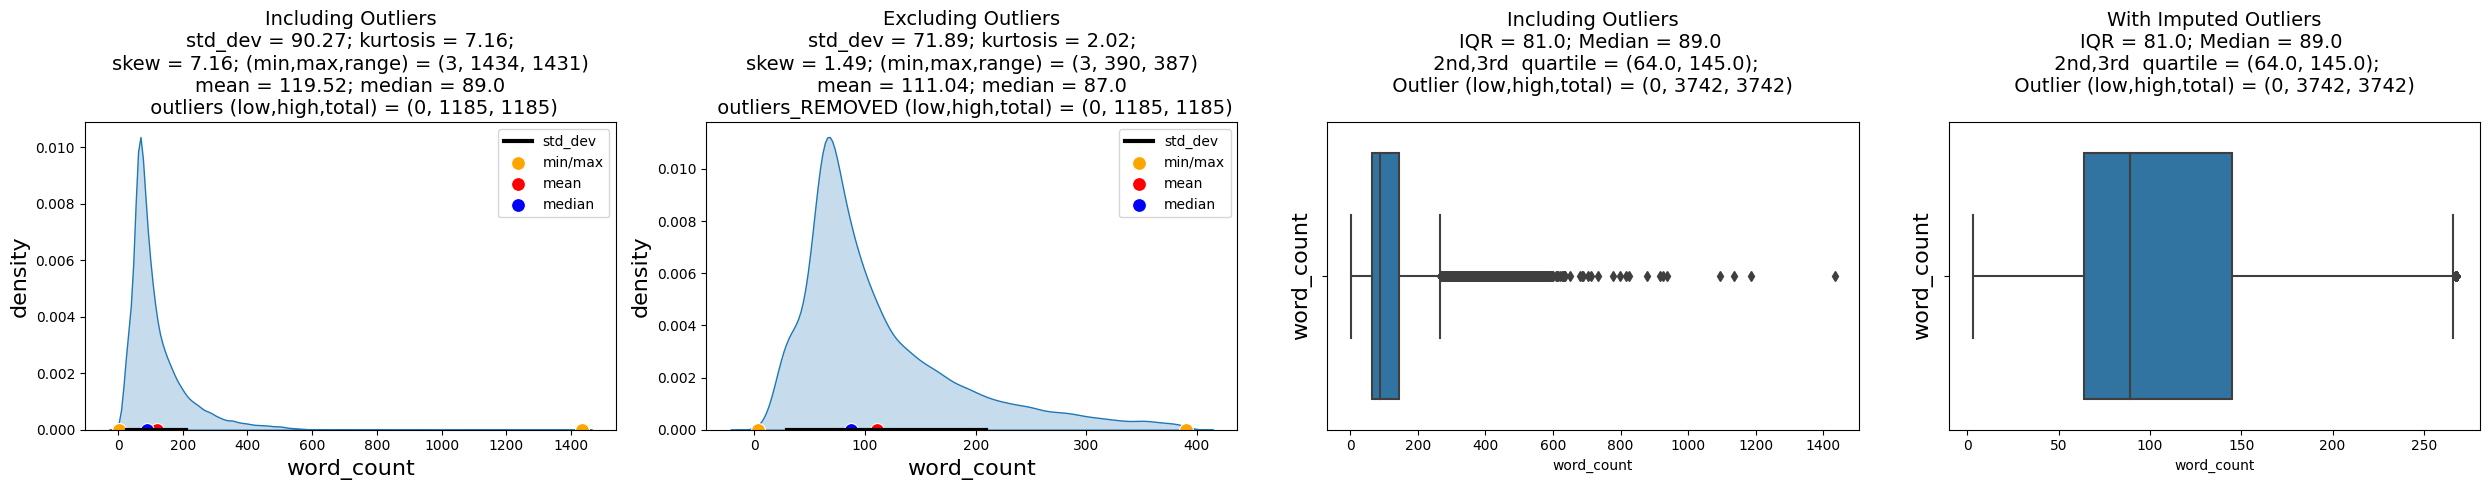

In [15]:
numerical_summary(data, ["word_count"])

**Observations:**
* Most of the review word count is slightlu less than 150.
* According to box-plot, the upper bount of reviews should be around 275.
* Since the outliers are approximately 7%, we cannot completely ignore them.
* According to the gaussian distribution, there are virtually negligible reviews that exceed 400 words.

**Therefore the max sequence length can be set to 400 words during the modelling time.**

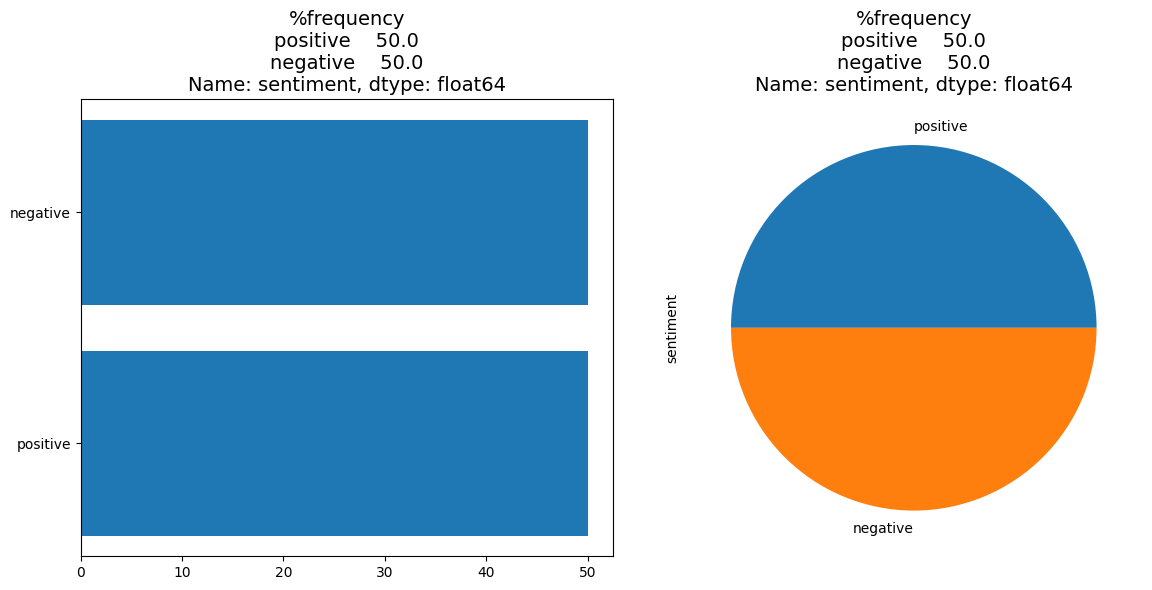

In [16]:
categorical_summary(data, ["sentiment"])

**Potential further analysis**
* checking word frequency and vocabulory
* association of words with positive or negative sentiment
* some visualisation relating to above

In [17]:
from keras.preprocessing.text import Tokenizer

In [18]:
def tokenizer(text):
    tkz = Tokenizer()
    tokens = tkz.fit_on_texts(text)
    return tokens, tkz.word_counts

In [19]:
text_tokens, text_vocab = tokenizer(data.clean_text)

In [20]:
len(text_vocab)

101522

**This vocab is too big to work with**

### checking for a good vocab count using elbow:

In [21]:
word_count_list = []
for i in range(15):
    word_count_list.append(
        len([word for (word, occur) in text_vocab.items() if occur > i])
    )

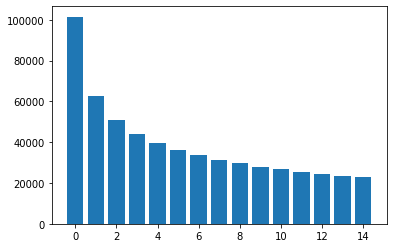

In [22]:
plt.bar([i for i in range(15)], word_count_list)
plt.show()

In [23]:
len([word for (word, occur) in text_vocab.items() if occur > 2])

50759

### **parametrs to use in model**
* VOCAB = 50759
* MAX_LEN = 400